In [162]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance

In [163]:
reliance = yfinance.download("RELIANCE.NS", period="2y")
reliance.head()

/tmp/ipython-input-2018581276.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  reliance = yfinance.download("RELIANCE.NS", period="2y")
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS
Date,,,,,
2023-12-19,1269.652710,1277.494571,1253.323497,1268.114050,16820604
2023-12-20,1254.291382,1289.878086,1250.742696,1276.080186,17736722
2023-12-21,1271.861450,1277.296201,1249.874163,1254.217020,13765454
2023-12-22,1273.102295,1280.968997,1264.466141,1270.397340,16541784
2023-12-26,1279.554443,1286.453333,1271.935784,1274.566338,7465664


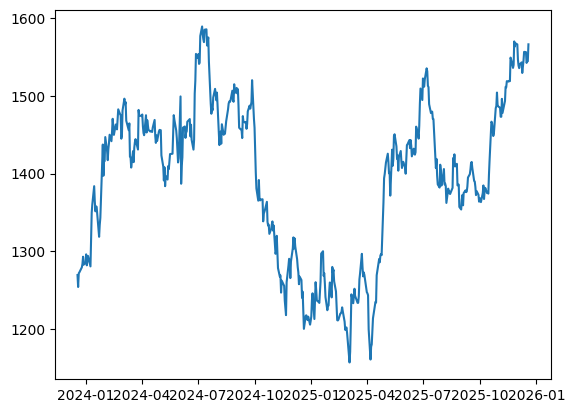

In [164]:
plt.plot(reliance["Close"])
plt.show()

# **Simple Moving Average (SMA)**

In [165]:
def SMA(data, period):
    prices = data.to_numpy()
    sma = [prices[0]]*len(prices)
    sma[0:period] = [np.nan]*period
    for i in range(period, len(prices)):
        sma[i] = np.mean(prices[i-period:i])
    return pd.Series(sma, index = data.index)

In [166]:
reliance["SMA"] = SMA(reliance["Close"], 14)
reliance.tail()

Price,Close,High,Low,Open,Volume,SMA
Ticker,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,
Date,,,,,,
2025-12-15,1556.199951,1558.599976,1546.500000,1551.199951,5774543,1548.478577
2025-12-16,1542.300049,1551.699951,1538.800049,1545.000000,11731856,1549.657148
2025-12-17,1544.400024,1550.000000,1539.300049,1550.000000,7116649,1547.685721
2025-12-18,1544.400024,1551.500000,1535.199951,1535.199951,6580829,1546.328578
2025-12-19,1566.199951,1574.199951,1551.000000,1554.400024,8576004,1544.678580


# **Exponential Moving Average (EMA)**

In [167]:
def EMA(data, period):
    multiplier = 2 / (period + 1)
    prices = data.to_numpy()
    ema = [0]*len(prices)
    ema[0] = prices[0]
    for i in range(1, len(prices)):
        ema[i] = ((prices[i] - ema[i-1])*multiplier + ema[i-1])
    return pd.Series(ema, index = data.index)


In [168]:
reliance["EMA"] = EMA(reliance["Close"], 14)
reliance["EMA"].tail()

,EMA
Date,
2025-12-15,[1543.452263278375]
2025-12-16,[1543.2986346850084]
2025-12-17,[1543.4454866488823]
2025-12-18,[1543.5727583509063]
2025-12-19,[1546.5897173937021]


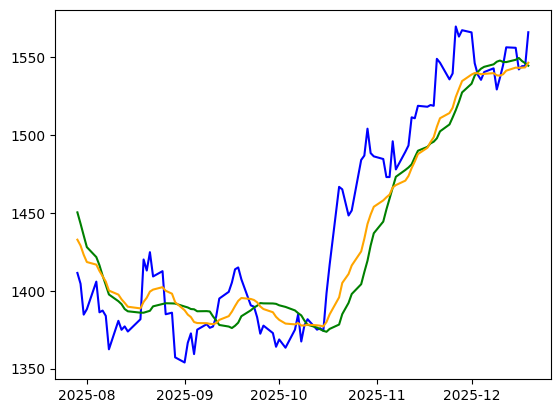

In [169]:
days = 100
plt.plot(reliance["Close"][-days:], color='blue')
plt.plot(reliance["SMA"][-days:], color='green')
plt.plot(reliance["EMA"][-days:], color='orange')
plt.show()

# **Moving Average Convergence Divergence (MACD)**

In [170]:
def MACD(stock):
    macd_line = EMA(stock["Close"], 12) - EMA(stock["Close"], 26)
    signal_line = EMA(macd_line, 9)
    return macd_line, signal_line

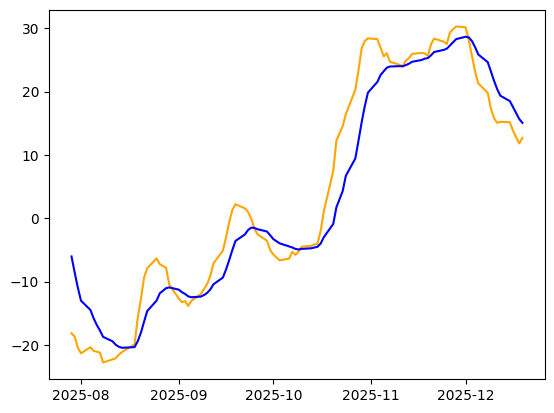

In [171]:
macd, signal = MACD(reliance)
days = 100
plt.plot(macd[-days:], color = 'orange')
plt.plot(signal[-days:], color= 'blue')
plt.show()

# **Relative Strength Index (RSI)**

In [172]:
def RSI(data, period):
    delta = data.diff().squeeze()
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)

    avg_gain = gain.rolling(window=period, min_periods=1).mean()
    avg_loss = loss.rolling(window=period, min_periods=1).mean()

    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))

    return rsi

In [173]:
reliance["RSI"] = RSI(reliance["Close"], 14)
reliance[["Close", "RSI"]].tail(5)

Price,Close,RSI
Ticker,RELIANCE.NS,
Date,,
2025-12-15,1556.199951,56.812546
2025-12-16,1542.300049,36.832064
2025-12-17,1544.400024,40.537839
2025-12-18,1544.400024,38.006234
2025-12-19,1566.199951,50.042835


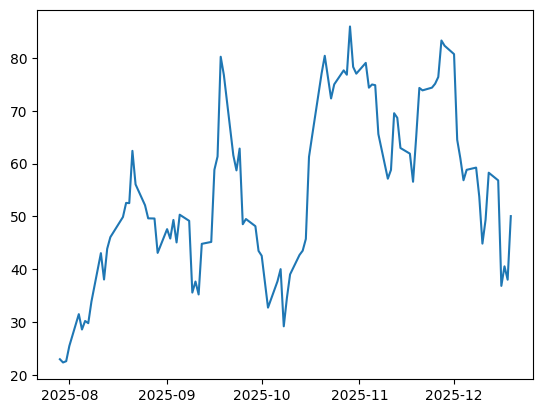

In [174]:
days = 100
plt.plot(reliance["RSI"][-days:])
plt.show()

# **Stochastic Oscillator**

In [175]:
def stochastic_oscillator(stock, n):
    low_n = stock['Low'].rolling(n).min()
    high_n = stock['High'].rolling(n).max()
    percent_K = 100*((stock["Close"]-low_n)/(high_n-low_n))
    percent_D = percent_K.rolling(3).mean()
    return percent_K, percent_D

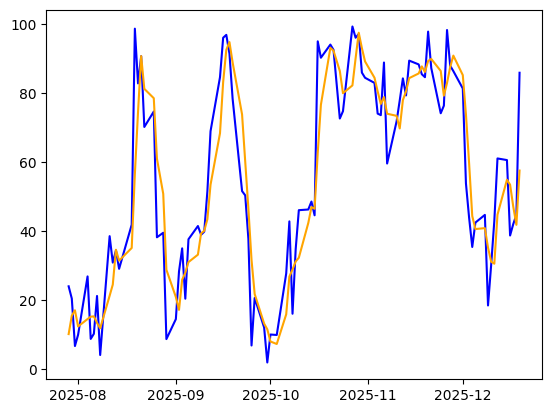

In [182]:
days = 100
percent_K, percent_D = stochastic_oscillator(reliance, 14)
plt.plot(percent_K[-days:], color='blue')
plt.plot(percent_D[-days:], color='orange')
plt.show()

# **Bollinger Bands**

In [177]:
def bollinger_band(data):
    data = data.squeeze()
    middle_band = SMA(data, 20)
    upper_band = middle_band + 2*data.rolling(window=20).std()
    lower_band = middle_band - 2*data.rolling(window=20).std()
    return lower_band, middle_band, upper_band

In [178]:
lower_band, middle_band, upper_band = bollinger_band(reliance["Close"])
lower_band.tail()

,0
Date,
2025-12-15,1513.986159
2025-12-16,1518.450599
2025-12-17,1522.877128
2025-12-18,1524.118794
2025-12-19,1522.440777


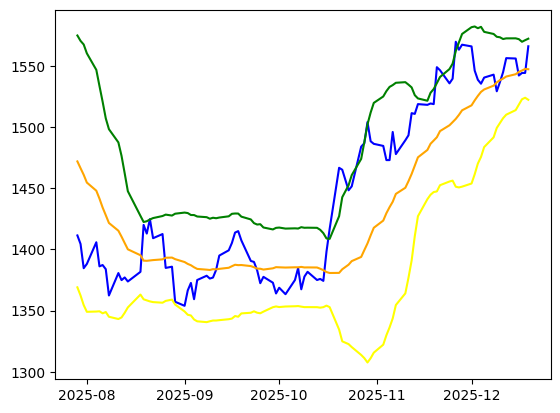

In [179]:
days = 100
lower_band, middle_band, upper_band = bollinger_band(reliance["Close"])
plt.plot(reliance["Close"][-days:], color='blue')
plt.plot(lower_band[-days:], color='yellow')
plt.plot(middle_band[-days:], color='orange')
plt.plot(upper_band[-days:], color='green')
plt.show()